In [1]:
# Import Libraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
movie = pd.read_csv('my_movies.csv')
movie.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
movie_1=movie.iloc[:,5:]
movie_1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [4]:
movie_1.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
movie_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [21]:
movie_1.duplicated().sum()

3

In [22]:
movie_1.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [23]:
movie_1.shape

(10, 10)

<AxesSubplot:>

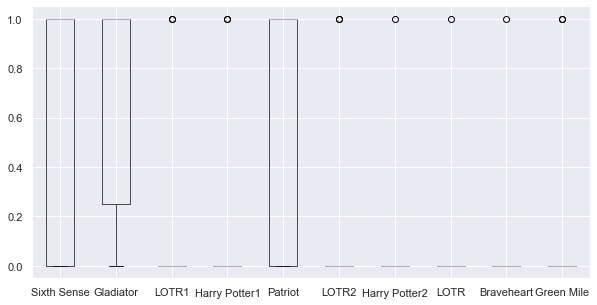

In [24]:
plt.figure(figsize=(10,5))
movie_1.boxplot()

# Dataset 
### * support=0.1  
### * lift_thershold=0.8 
### * confi_threshold=0.9

In [5]:
from apyori import apriori
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import pyforest

In [6]:
movie_itemsets = apriori(movie_1, min_support=0.1, use_colnames=True)
movie_itemsets.head()

C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [7]:
confi_rules = association_rules(movie_itemsets, metric="confidence", min_threshold=0.9)
confi_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
120,"(Harry Potter1, LOTR1)","(LOTR2, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
121,"(Green Mile, Harry Potter1)","(LOTR2, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
122,"(Sixth Sense, Harry Potter1)","(LOTR2, Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
123,"(Green Mile, LOTR1)","(LOTR2, Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


In [8]:
rules = association_rules(movie_itemsets, metric="lift", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
241,(LOTR2),"(Sixth Sense, Green Mile, Harry Potter1, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(Harry Potter1),"(LOTR2, Green Mile, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(LOTR1),"(LOTR2, Sixth Sense, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
244,(Green Mile),"(LOTR2, Sixth Sense, Harry Potter1, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [9]:
rules.sort_values('lift',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
197,"(Sixth Sense, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
165,"(Green Mile, Harry Potter1)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
107,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
182,"(Green Mile, LOTR1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
207,"(LOTR2, Harry Potter1)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
225,"(LOTR2, Sixth Sense, LOTR1)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
155,"(Harry Potter1, LOTR1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
154,"(Sixth Sense, LOTR1)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
224,"(LOTR2, Green Mile, LOTR1)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
223,"(LOTR2, Sixth Sense, Harry Potter1)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

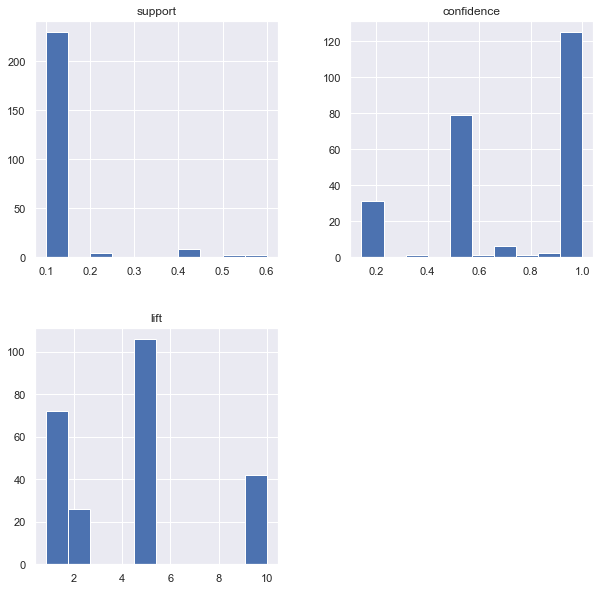

In [30]:
rules[['support','confidence', 'lift']].hist(figsize=(10,10))

In [10]:
r=rules[rules.lift>1]
r


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
241,(LOTR2),"(Sixth Sense, Green Mile, Harry Potter1, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(Harry Potter1),"(LOTR2, Green Mile, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(LOTR1),"(LOTR2, Sixth Sense, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
244,(Green Mile),"(LOTR2, Sixth Sense, Harry Potter1, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [11]:
lift=r.pivot('antecedents','consequents','lift')
lift.head()

consequents,(Gladiator),"(LOTR2, Green Mile)","(LOTR, Green Mile)","(Braveheart, Gladiator)","(Braveheart, Patriot)","(LOTR2, LOTR1)","(LOTR, Sixth Sense, Gladiator)",(Harry Potter1),"(Green Mile, Sixth Sense, Gladiator)","(LOTR, Green Mile, Gladiator)",...,"(LOTR, Sixth Sense)","(Green Mile, Gladiator)","(Harry Potter1, LOTR1)","(Sixth Sense, LOTR1)","(LOTR2, Green Mile, Harry Potter1)","(Sixth Sense, Harry Potter1)","(LOTR2, Sixth Sense)","(LOTR2, Sixth Sense, Green Mile, Harry Potter1)","(Sixth Sense, Gladiator)","(LOTR2, Green Mile, Harry Potter1, LOTR1)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(Sixth Sense),1.190476,1.666667,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,1.666667,...,NaN,1.666667,1.666667,NaN,1.666667,NaN,NaN,NaN,NaN,1.666667
"(LOTR2, Green Mile)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,10.000000,10.0,NaN,10.0,NaN,NaN,NaN,NaN
"(LOTR, Green Mile)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
"(Braveheart, Patriot)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Gladiator)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5,
        44.5, 46.5]),
 [Text(0.5, 0, "frozenset({'Gladiator'})"),
  Text(2.5, 0, "frozenset({'LOTR', 'Green Mile'})"),
  Text(4.5, 0, "frozenset({'Braveheart', 'Patriot'})"),
  Text(6.5, 0, "frozenset({'LOTR', 'Sixth Sense', 'Gladiator'})"),
  Text(8.5, 0, "frozenset({'Green Mile', 'Sixth Sense', 'Gladiator'})"),
  Text(10.5, 0, "frozenset({'LOTR', 'Green Mile', 'Sixth Sense'})"),
  Text(12.5, 0, "frozenset({'LOTR2', 'Harry Potter1', 'LOTR1'})"),
  Text(14.5, 0, "frozenset({'LOTR2', 'Sixth Sense', 'Harry Potter1'})"),
  Text(16.5, 0, "frozenset({'Green Mile', 'Sixth Sense', 'LOTR1'})"),
  Text(18.5, 0, "frozenset({'LOTR2', 'Green Mile', 'Sixth Sense'})"),
  Text(20.5, 0, "frozenset({'LOTR2', 'Harry Potter1'})"),
  Text(22.5, 0, "frozenset({'Green Mile', 'Harry Potter1'})"),
  Text(24.5, 0, "frozenset({'Sixth Sense'})"),
  Text(26.5, 0, "fro

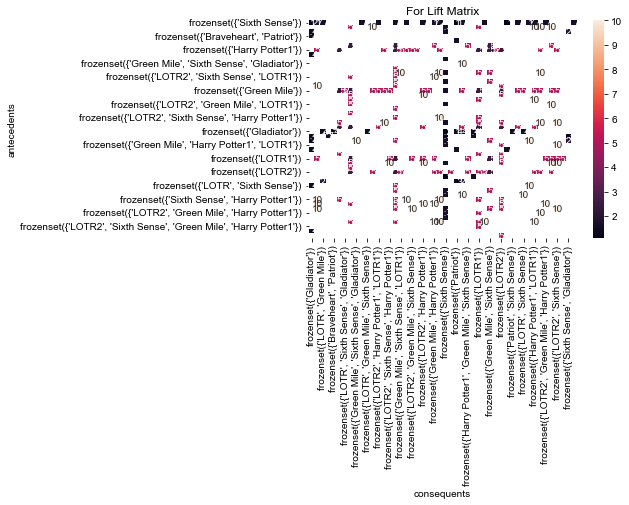

In [12]:
sns.heatmap(lift,annot = True)
sns.set(rc={'figure.figsize':(60,30)})
plt.title('For Lift Matrix')

plt.yticks(rotation=0)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'support vs confidence')

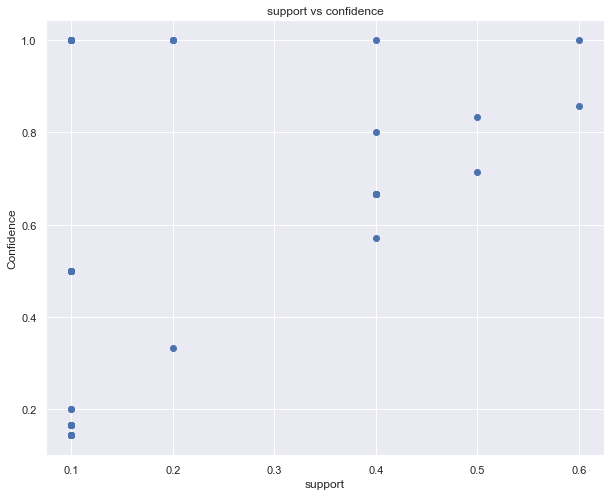

In [13]:
support=r['support']
confindenc=r['confidence']
plt.figure(figsize=(10,8))
plt.scatter(support,confindenc)
plt.xlabel('support')
plt.ylabel('Confidence')
plt.title('support vs confidence')

## * support=0.20
## * threshold=0.95

In [14]:
movie_itemsets2 = apriori(movie_1, min_support=0.20, use_colnames=True)
movie_itemsets2

C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [15]:
rules2 = association_rules(movie_itemsets2, metric="lift", min_threshold=0.95)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [16]:
r2=rules2[rules2.lift>1]
r2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

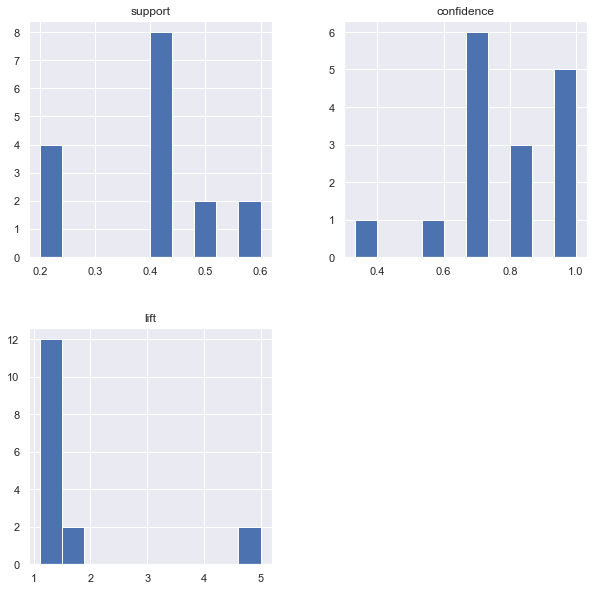

In [29]:
rules2[['support','confidence', 'lift']].hist(figsize=(10,10))

In [17]:
lift2=r2.pivot('antecedents','consequents','lift')
lift2.head()

consequents,(Gladiator),(Sixth Sense),(Patriot),(Green Mile),(LOTR1),(LOTR2),"(Sixth Sense, Gladiator)","(Patriot, Gladiator)","(Patriot, Sixth Sense)"
antecedents,,,,,,,,,
(Sixth Sense),1.190476,NaN,1.111111,1.666667,NaN,NaN,NaN,1.111111,NaN
(Gladiator),NaN,1.190476,1.428571,NaN,NaN,NaN,NaN,NaN,1.428571
(Patriot),1.428571,1.111111,NaN,NaN,NaN,NaN,1.333333,NaN,NaN
(Green Mile),NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(LOTR2),NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5]),
 [Text(0.5, 0, "frozenset({'Gladiator'})"),
  Text(1.5, 0, "frozenset({'LOTR2', 'Green Mile'})"),
  Text(2.5, 0, "frozenset({'LOTR', 'Green Mile'})"),
  Text(3.5, 0, "frozenset({'Braveheart', 'Gladiator'})"),
  Text(4.5, 0, "frozenset({'Braveheart', 'Patriot'})"),
  Text(5.5, 0, "frozenset({'LOTR2', 'LOTR1'})"),
  Text(6.5, 0, "frozenset({'LOTR', 'Sixth Sense', 'Gladiator'})"),
  Text(7.5, 0, "frozenset({'Harry Potter1'})"),
  Text(8.5, 0, "frozenset({'Green Mile', 'Sixth Sense', 'Gladiator'})"),
  Text(9.5, 0, "frozenset({'LOTR', 'Green Mile', 'Gladiator'})"),
  Text(10.5, 0, "frozenset({'LOTR', 'Green Mile', 'Sixth Sense'})"),
  Text(11.5, 0, "frozenset({'Sixt

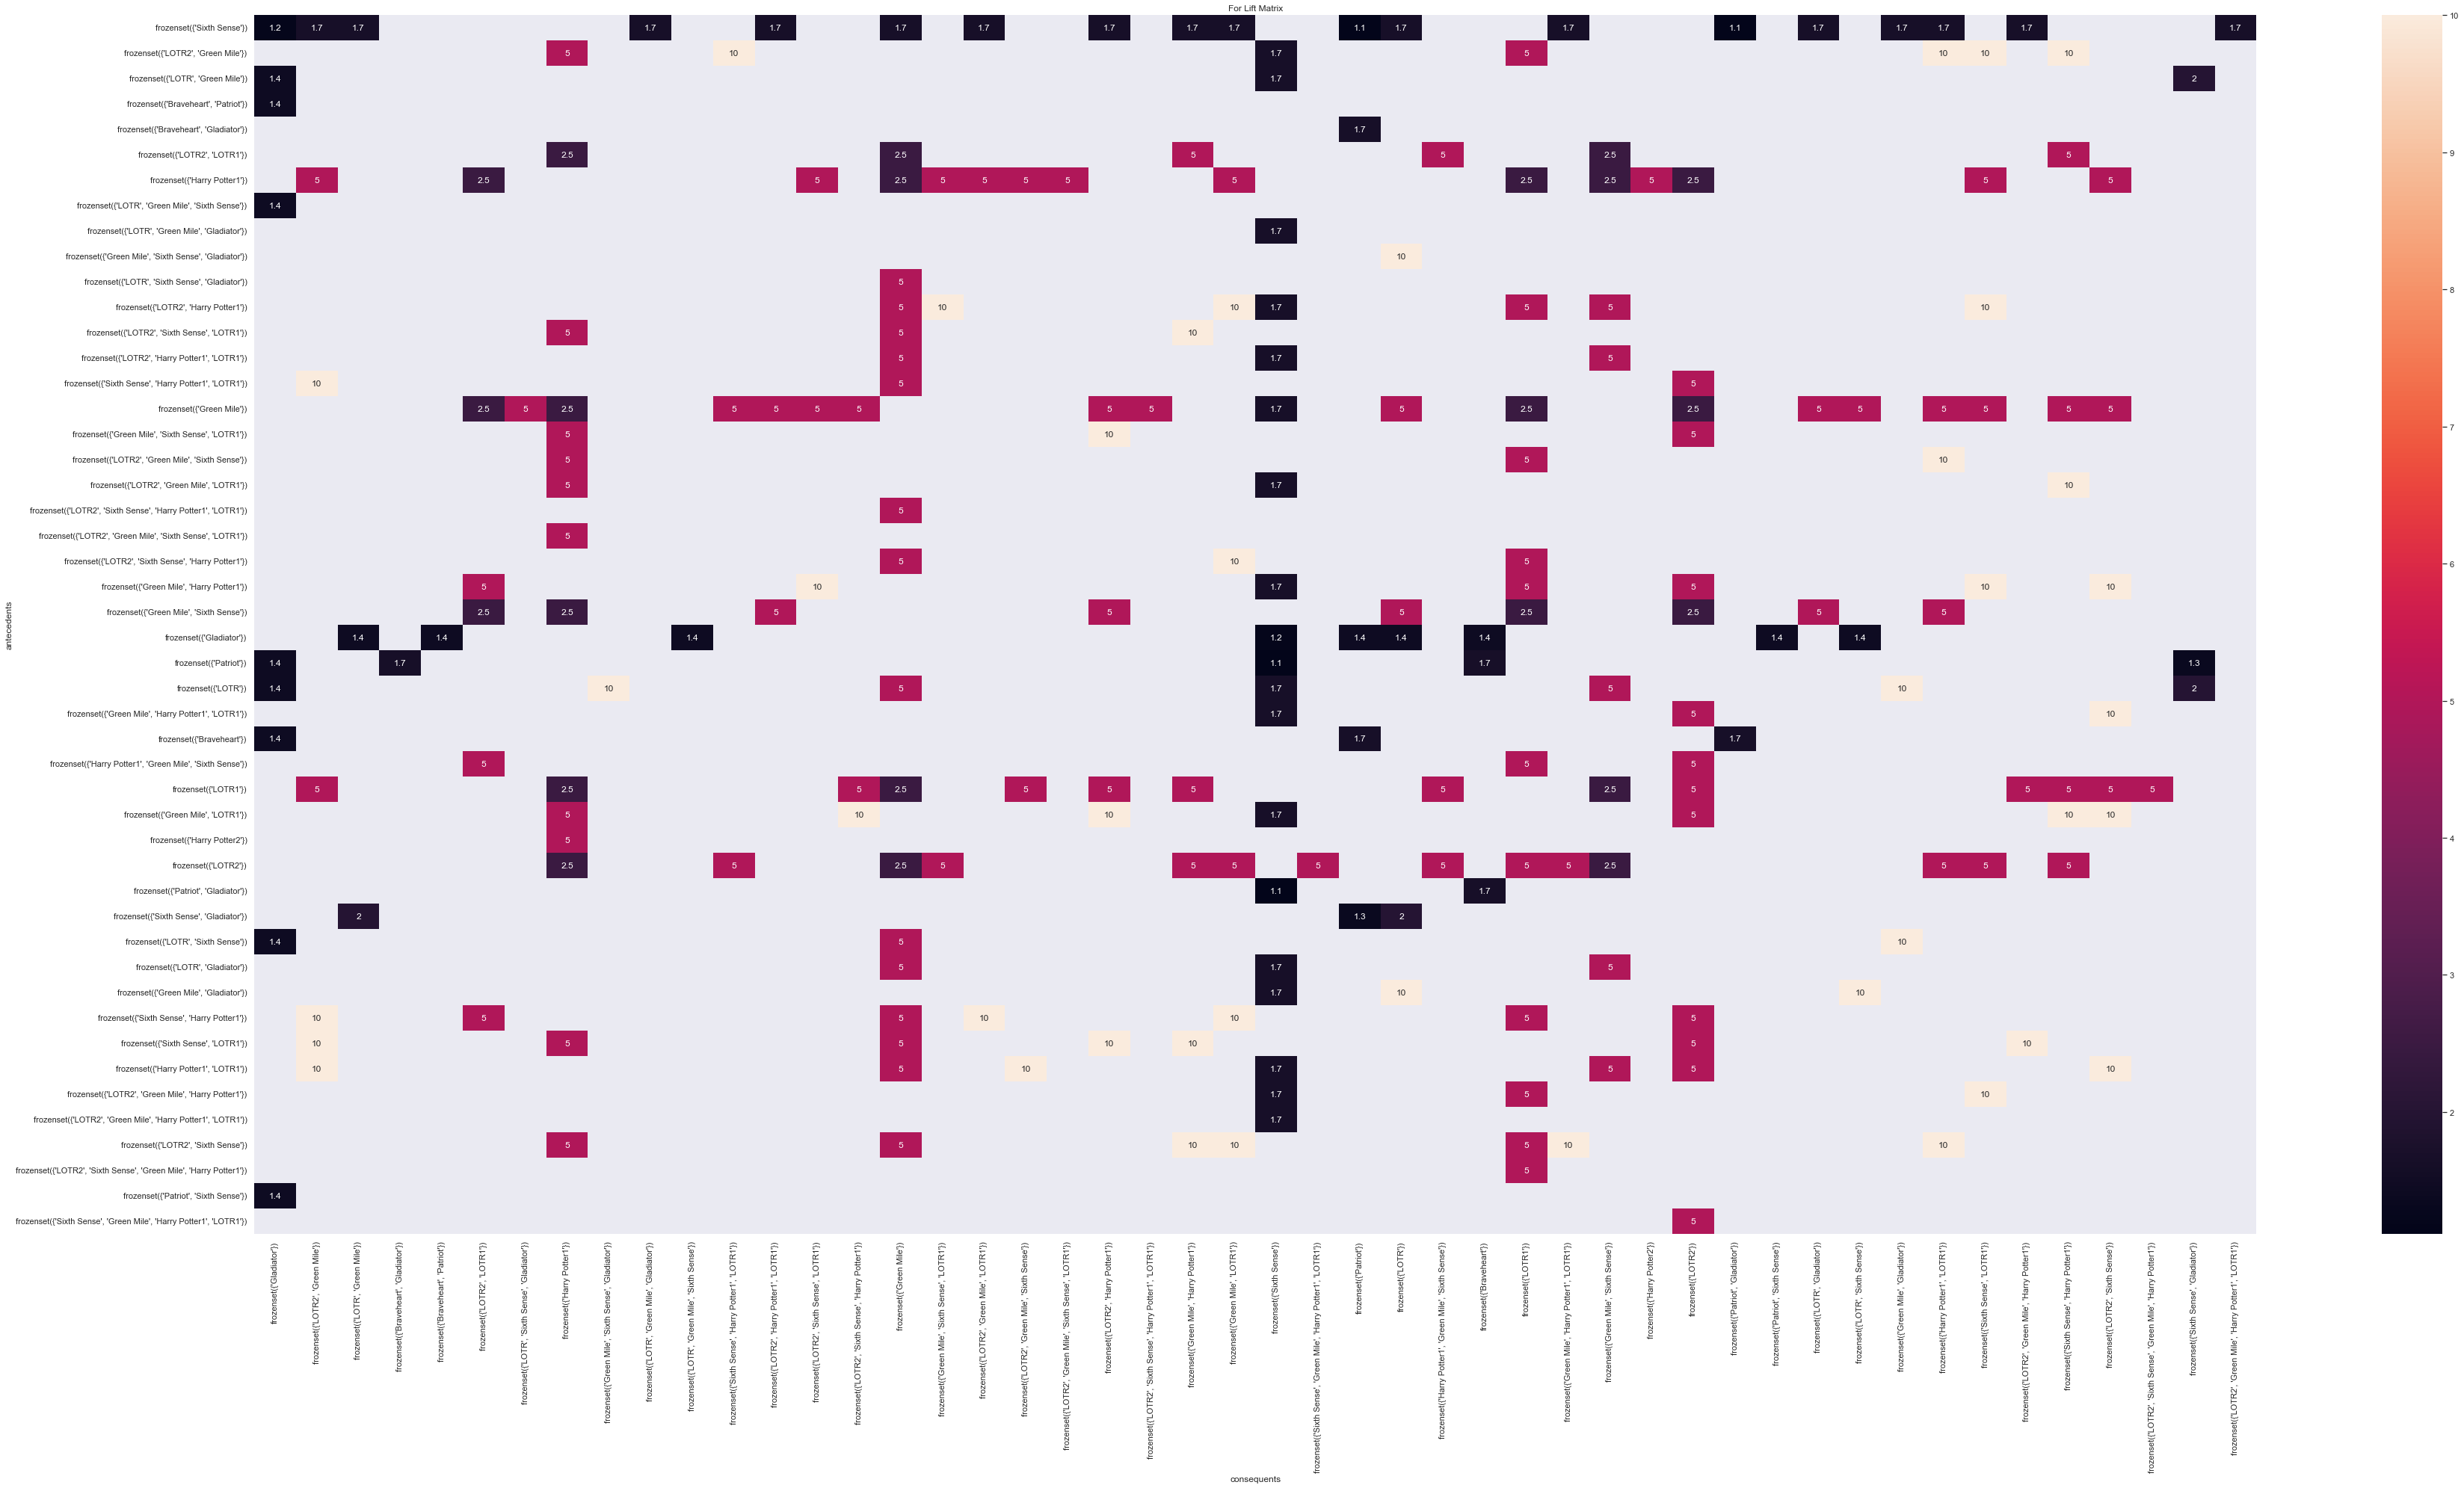

In [18]:
sns.heatmap(lift,annot = True)
sns.set(rc={'figure.figsize':(60,30)})
plt.title('For Lift Matrix')

plt.yticks(rotation=0)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'support vs confidence')

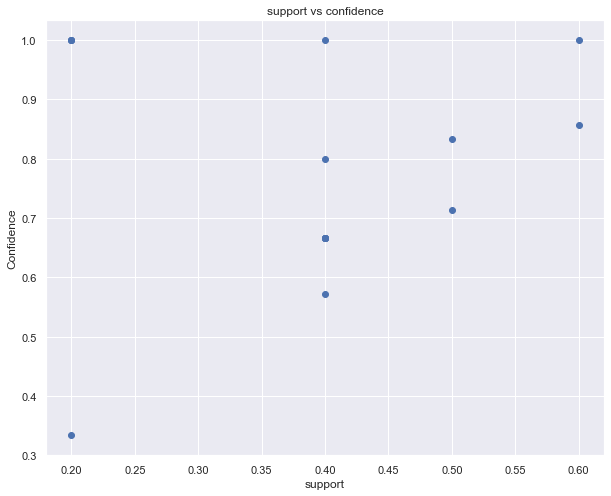

In [19]:
support=r2['support']
confindenc=r2['confidence']
plt.figure(figsize=(10,8))
plt.scatter(support,confindenc)
plt.xlabel('support')
plt.ylabel('Confidence')
plt.title('support vs confidence')

In [25]:
x = rules.loc[rules['lift'] > 2]
print(x.shape)
print(x)

(170, 9)
                   antecedents  \
20             (Harry Potter1)   
21                     (LOTR1)   
22                     (LOTR2)   
23                     (LOTR1)   
24                (Green Mile)   
..                         ...   
240  (Green Mile, Sixth Sense)   
241                    (LOTR2)   
242            (Harry Potter1)   
243                    (LOTR1)   
244               (Green Mile)   

                                         consequents  antecedent support  \
20                                           (LOTR1)                 0.2   
21                                   (Harry Potter1)                 0.2   
22                                           (LOTR1)                 0.2   
23                                           (LOTR2)                 0.2   
24                                           (LOTR1)                 0.2   
..                                               ...                 ...   
240                    (LOTR2, Harry Potter1, LOTR

In [26]:
x.describe()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.0
mean,0.144706,0.144706,0.101176,0.782353,5.911765,0.080824,inf
std,0.049866,0.049866,0.010814,0.248630,2.488050,0.012328,NaN
min,0.100000,0.100000,0.100000,0.500000,2.500000,0.060000,1.6
25%,0.100000,0.100000,0.100000,0.500000,5.000000,0.080000,1.8
50%,0.100000,0.100000,0.100000,1.000000,5.000000,0.080000,NaN
75%,0.200000,0.200000,0.100000,1.000000,5.000000,0.090000,NaN
max,0.200000,0.200000,0.200000,1.000000,10.000000,0.160000,inf


In [27]:
x[['antecedents','consequents']]

,antecedents,consequents
20,(Harry Potter1),(LOTR1)
21,(LOTR1),(Harry Potter1)
22,(LOTR2),(LOTR1)
23,(LOTR1),(LOTR2)
24,(Green Mile),(LOTR1)
...,...,...
240,"(Green Mile, Sixth Sense)","(LOTR2, Harry Potter1, LOTR1)"
241,(LOTR2),"(Sixth Sense, Green Mile, Harry Potter1, LOTR1)"
242,(Harry Potter1),"(LOTR2, Green Mile, Sixth Sense, LOTR1)"
243,(LOTR1),"(LOTR2, Sixth Sense, Green Mile, Harry Potter1)"


# The End